In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

# call_Apriori_def

In [2]:
from Apriori_def import (
    read_data,
    columns_info,
    bar_plot,
    transaction_to_df,
    association_rules_apriori,
    plot_rule_px_scatter,
    plot_rule_scatter,
    plot_rule_polyfit
)

# read_data

In [3]:
df = read_data(r"Association_Rule_data.csv")
print(df.shape)
df.head(3)

the DataFrame have 759 duplicates rows
the DataFrame without duplicates rows
Data read successfully from Association_Rule_data.csv
(38006, 3)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit


In [4]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,Member_number,int64,"[1808, 2552, 2300, 1187, 3037, 4941, 4501, 380...",3898,38006,0
1,Date,object,"[21-07-2015, 05-01-2015, 19-09-2015, 12-12-201...",728,38006,0
2,itemDescription,object,"[tropical fruit, whole milk, pip fruit, other ...",167,38006,0


# from the data

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

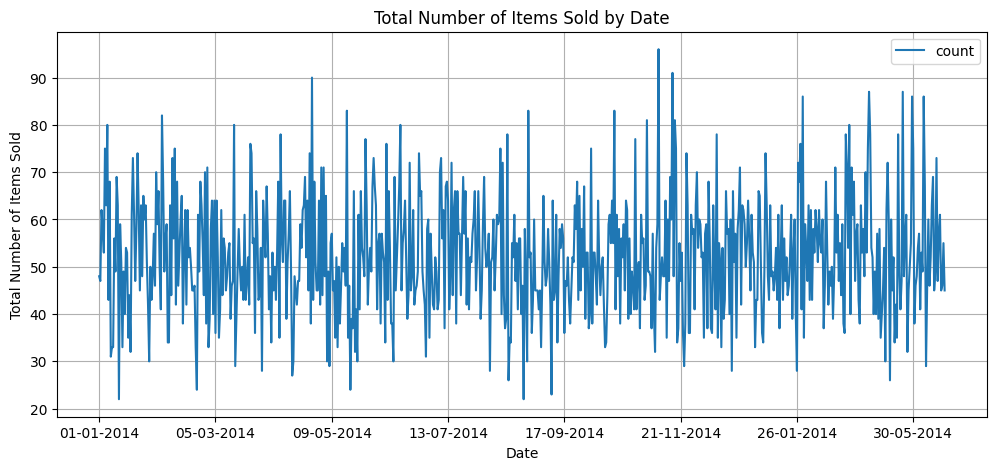

In [5]:
df.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [6]:
d=df.set_index(['Date'])
d.index=pd.to_datetime(d.index ,dayfirst=True)

total_items = len(d)

total_days = len(np.unique(d.index.date))

total_months = len(np.unique(d.index.month))

average_items = total_items / total_days

unique_items = d['itemDescription'].unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38006 items sold in 728 days throughout 12 months
With an average of 52.206043956043956 items sold daily


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

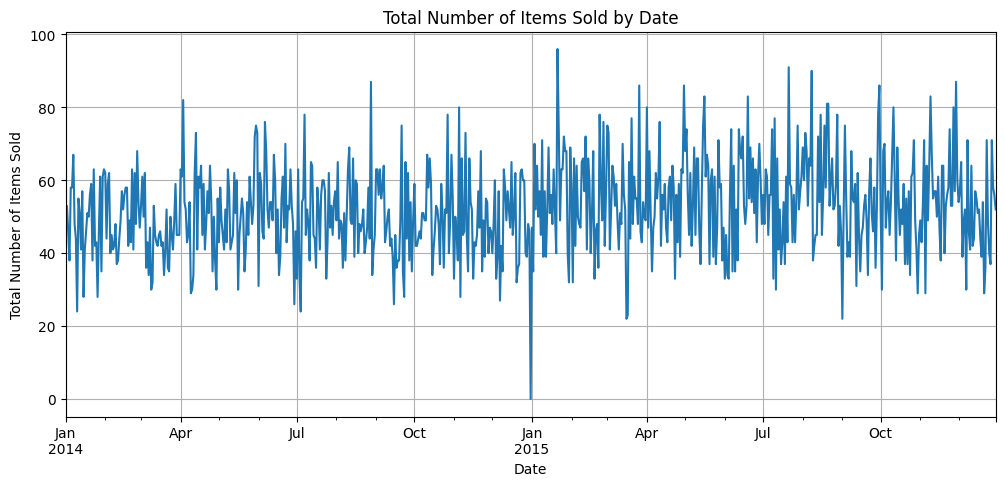

In [7]:
d.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

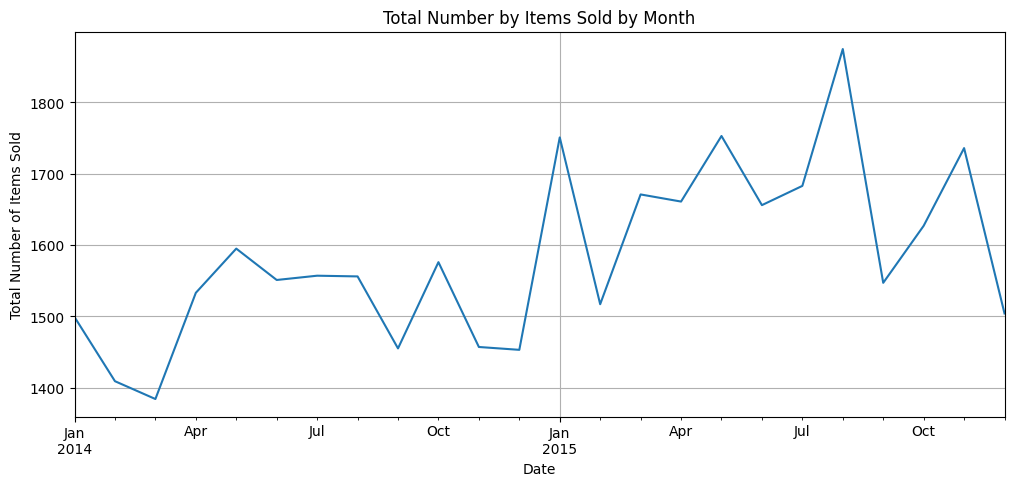

In [8]:
d.resample("ME")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [9]:
bar_plot(df,'itemDescription')

# get transactions

In [10]:
data_group = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(lambda x: ','.join(x))
data_group

Member_number  Date      
1000           15-03-2015        sausage,whole milk,semi-finished bread,yogurt
               24-06-2014                        whole milk,pastry,salty snack
               24-07-2015                          canned beer,misc. beverages
               25-11-2015                             sausage,hygiene articles
               27-05-2015                              soda,pickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruit,berries,other vegetables,yogurt...
               26-12-2015                                  bottled water,herbs
5000           09-03-2014                         fruit/vegetable juice,onions
               10-02-2015             soda,root vegetables,semi-finished bread
               16-11-2014                        bottled beer,other vegetables
Name: itemDescription, Length: 14963, dtype: object

In [11]:
# # If you want to come up with all the purchases that a person has purchased and This is an error in this example.
# new_df = df.groupby(['Member_number', 'itemDescription']).size().unstack().fillna(0)

In [12]:
df_group = pd.DataFrame(data_group).reset_index()
df_group.drop(['Member_number', 'Date'], axis=1, inplace=True)
df_group

,itemDescription
0,"sausage,whole milk,semi-finished bread,yogurt"
1,"whole milk,pastry,salty snack"
2,"canned beer,misc. beverages"
3,"sausage,hygiene articles"
4,"soda,pickled vegetables"
...,...
14958,"tropical fruit,berries,other vegetables,yogurt..."
14959,"bottled water,herbs"
14960,"fruit/vegetable juice,onions"
14961,"soda,root vegetables,semi-finished bread"


In [13]:
transactions = df_group['itemDescription'].apply(lambda x : x.split(','))
print(transactions.shape)
transactions.head(3)

(14963,)


0    [sausage, whole milk, semi-finished bread, yog...
1                    [whole milk, pastry, salty snack]
2                       [canned beer, misc. beverages]
Name: itemDescription, dtype: object

In [14]:
transactions[0]

['sausage', 'whole milk', 'semi-finished bread', 'yogurt']

In [15]:
te_df = transaction_to_df(transactions)
print(te_df.shape)
te_df.head(3)

(14963, 167)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# association_rules with apriori

In [16]:
freq_items, rules = association_rules_apriori(te_df, min_support = 0.001, min_threshold = 0.001, metric = 'lift')

Processing 28 combinations | Sampling itemset size 4e 3


In [17]:
print(freq_items.shape)
freq_items.head(3)

(750, 3)


,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1


In [18]:
print(rules.shape)
rules.head(3)

(1238, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234


In [19]:
rules.sort_values('lift',ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1237,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,0.576701
1232,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
1234,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
1235,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727
474,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,0.417500


In [20]:
rules.sort_values('confidence',ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1233,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
1209,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
1227,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,0.122281
1108,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
1220,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751


In [21]:
rules.sort_values('support',ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
952,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
953,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
1057,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
1056,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1136,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587


In [22]:
rules[(rules['confidence']>0.13) & (rules['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
584,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814,0.030162
630,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
728,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
956,(packaged fruit/vegetables),(rolls/buns),0.008488,0.110005,0.001203,0.141732,1.288421,0.000269,1.036967,0.225772
1022,(processed cheese),(rolls/buns),0.010158,0.110005,0.001470,0.144737,1.315734,0.000353,1.040610,0.242430
1036,(seasonal products),(rolls/buns),0.007084,0.110005,0.001002,0.141509,1.286395,0.000223,1.036698,0.224222
1108,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
1185,"(rolls/buns, soda)",(other vegetables),0.008087,0.122101,0.001136,0.140496,1.150651,0.000149,1.021402,0.131994
1209,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
1220,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751


In [23]:
print(len(rules[(rules['confidence']>0.1) & (rules['lift'] > 1.5)]))

5


In [24]:
plot_rule_px_scatter(rules, x = 'support', y = 'confidence')

In [25]:
plot_rule_px_scatter(rules, x = 'support', y = 'lift')

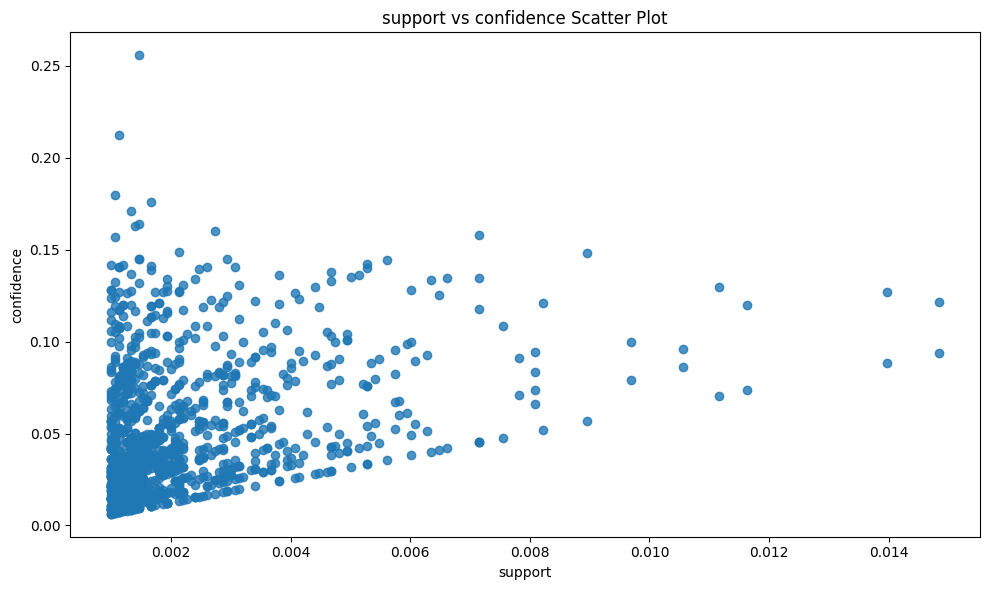

In [26]:
plot_rule_scatter(rules, x = 'support', y = 'confidence')

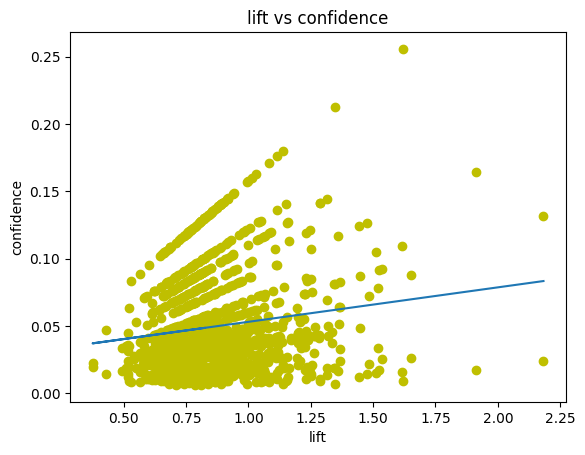

In [27]:
plot_rule_polyfit(rules, x = 'lift', y = 'confidence')